# How to run file

Ensure the following files are in the current working directory:

- harlech_data_full.csv
- harlech_data_proportions.csv

Then, hit runtime -> Run All

In [3]:
import pandas as pd

In [4]:
# Read in data and remove unneeded columns
df1 = pd.read_csv("harlech_data_full.csv")
df = pd.read_csv("harlech_data_proportions.csv")
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df['County'] = df1['County']
df.drop([
    "Unnamed: 0",
    "Date",
], axis = 1, inplace = True)
df

,Year,Poverty,Population,Bottles Sold PC,Sales Volume PC,Volume Sold PC,Vodka Sold PC,Gin Sold PC,Rum Sold PC,Whiskey Sold PC,...,Other Prop,HighIncome Prop,LowIncome Prop,MidIncome Prop,Middle-Old Prop,Middle-Young Prop,Old Prop,Young Prop,Month,County
0,2012,10.6,7466.0,0.045406,0.572024,0.042743,0.005224,0.000268,0.002947,0.009108,...,0.001751,0.104878,0.262927,0.632195,0.290708,0.205457,0.391118,0.112716,1,ADAIR
1,2012,10.2,3910.0,0.028900,0.381381,0.028885,0.004604,0.000767,0.001535,0.006138,...,0.000000,0.102477,0.222886,0.674637,0.308361,0.197993,0.366555,0.127090,1,ADAMS
2,2012,9.7,5861.0,0.045897,0.496417,0.040203,0.012967,0.000000,0.007507,0.002389,...,0.000000,0.126021,0.324971,0.549008,0.305332,0.186828,0.402554,0.105287,1,AUDUBON
3,2012,9.6,25829.0,0.004181,0.049647,0.003659,0.001161,0.000000,0.000232,0.000465,...,0.002519,0.173219,0.200028,0.626754,0.327041,0.246467,0.307464,0.119027,1,BENTON
4,2012,15.7,131904.0,0.000970,0.010843,0.000835,0.000273,0.000000,0.000136,0.000106,...,0.015072,0.127840,0.284954,0.587206,0.253147,0.240095,0.287378,0.219379,1,BLACK HAWK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69438,2020,6.7,52265.0,0.069683,0.827824,0.051261,0.017105,0.001607,0.003482,0.015230,...,0.006389,0.313702,0.119359,0.566939,0.275910,0.274680,0.313720,0.135690,12,WARREN
69439,2020,8.2,21992.0,0.024509,0.399129,0.021340,0.003228,0.000045,0.000864,0.002183,...,0.026199,0.165685,0.169664,0.664651,0.267087,0.244699,0.344600,0.143614,12,WASHINGTON
69440,2020,16.0,6415.0,0.061263,0.614560,0.040369,0.015744,0.000000,0.008730,0.004832,...,0.005447,0.111705,0.256090,0.632204,0.263591,0.209877,0.391596,0.134936,12,WAYNE
69441,2020,14.3,35934.0,0.144125,1.899786,0.111520,0.034536,0.004035,0.013358,0.024935,...,0.015764,0.150124,0.281454,0.568422,0.253665,0.224647,0.349042,0.172646,12,WEBSTER


In [5]:
# Rescale alcohol variables to be a proportion of bottles sold
df['Total'] = df['Vodka Sold PC'] + df['Gin Sold PC'] + df['Rum Sold PC'] + df['Whiskey Sold PC'] + df['Tequila Sold PC'] + df['Other Alc Sold PC']
df['Vodka Sold PC'] = df['Vodka Sold PC'] / df['Total']
df['Gin Sold PC'] = df['Gin Sold PC'] / df['Total']
df['Rum Sold PC'] = df['Rum Sold PC'] / df['Total']
df['Whiskey Sold PC'] = df['Whiskey Sold PC'] / df['Total']
df['Tequila Sold PC'] = df['Tequila Sold PC'] / df['Total']
df['Other Alc Sold PC'] = df['Other Alc Sold PC'] / df['Total']

# Remove the column we used to rescale
df.drop(['Total'], axis = 1, inplace = True)

# Rename variables for simplicity
df.rename({'Vodka Sold PC' : 'Vodka',
           'Gin Sold PC' : 'Gin',
           'Rum Sold PC' : 'Rum',
           'Whiskey Sold PC' : 'Whiskey',
           'Tequila Sold PC' : 'Tequila',
           'Other Alc Sold PC' : 'Other Alc'}, axis = 1, inplace = True)

In [6]:
# Dummify months, years, and counties
months = pd.get_dummies(df['Month'], drop_first = True)
months.columns = ["month_" + str(column) for column in months.columns]
years = pd.get_dummies(df['Year'], drop_first = True)
years.columns = ["year_" + str(column) for column in years.columns]
counties = pd.get_dummies(df['County'], drop_first = True)
df.drop(['Year', 'Month'], axis = 1, inplace = True)
df = pd.concat([df, months, years, counties], axis = 1)

In [7]:
# Number of unique instances of Polk County population estimates
len(df[df['County'] == 'POLK']['Population'].value_counts().values)

9

In [8]:
# Get correlations between all the predictors
all_corr = df.corr().drop(['Volume Sold PC', 'Sales Volume PC', 'Bottles Sold PC'], axis = 1).drop(['Volume Sold PC', 'Sales Volume PC', 'Bottles Sold PC'], axis = 0)
# Just reassign the perfect relationships (i.e. pairs of the same variable) to be 0
all_corr = all_corr.replace(1, 0)
all_corr.columns = ["Correlation_" + column for column in all_corr.columns]
all_corr['Variable 1'] = all_corr.index
all_corr.reset_index(drop = True, inplace = True)

In [9]:
all_corr

,Correlation_Poverty,Correlation_Population,Correlation_Vodka,Correlation_Gin,Correlation_Rum,Correlation_Whiskey,Correlation_Tequila,Correlation_Other Alc,Correlation_is_weekend,Correlation_White Prop,...,Correlation_WARREN,Correlation_WASHINGTON,Correlation_WAYNE,Correlation_WEBSTER,Correlation_WINNEBAGO,Correlation_WINNESHIEK,Correlation_WOODBURY,Correlation_WORTH,Correlation_WRIGHT,Variable 1
0,0.000000,0.109755,-0.005499,0.047174,0.004336,-0.021696,0.037314,-0.008466,-0.005997,-0.398216,...,-0.181262,-0.073055,0.080434,0.123772,-0.082071,-0.071061,0.058168,-0.064802,0.018359,Poverty
1,0.109755,0.000000,0.085755,0.088438,-0.042099,-0.046690,0.065664,-0.061023,-0.011316,-0.622622,...,-0.007151,-0.034203,-0.042779,-0.025408,-0.050103,-0.032688,0.058449,-0.041205,-0.041754,Population
2,-0.005499,0.085755,0.000000,-0.062943,-0.191633,-0.225965,-0.082458,-0.537177,-0.013041,-0.037775,...,0.031190,-0.020691,-0.033435,0.005702,0.005282,-0.004196,-0.016988,0.001219,0.018183,Vodka
3,0.047174,0.088438,-0.062943,0.000000,-0.047321,-0.084087,-0.001048,-0.134616,-0.004701,-0.107036,...,-0.011199,0.009822,0.010787,0.011419,-0.021409,0.017174,0.006264,-0.002998,-0.016893,Gin
4,0.004336,-0.042099,-0.191633,-0.047321,0.000000,-0.171553,-0.040264,-0.324782,-0.009285,0.058825,...,-0.016483,-0.003415,-0.032228,-0.011348,0.009476,-0.011587,0.002100,0.017660,-0.002340,Rum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,-0.082071,-0.050103,0.005282,-0.021409,0.009476,0.006038,0.008546,-0.011641,-0.006742,0.045404,...,-0.014126,-0.009883,-0.008323,-0.013450,0.000000,-0.008980,-0.011256,-0.008200,-0.009380,WINNEBAGO
136,-0.071061,-0.032688,-0.004196,0.017174,-0.011587,-0.042868,-0.005490,0.037720,0.000552,0.057698,...,-0.011891,-0.008319,-0.007006,-0.011322,-0.008980,0.000000,-0.009475,-0.006903,-0.007896,WINNESHIEK
137,0.058168,0.058449,-0.016988,0.006264,0.002100,-0.010289,0.008458,0.015862,-0.010127,-0.195821,...,-0.014904,-0.010427,-0.008781,-0.014191,-0.011256,-0.009475,0.000000,-0.008652,-0.009896,WOODBURY
138,-0.064802,-0.041205,0.001219,-0.002998,0.017660,-0.029153,0.014933,0.003808,-0.006557,0.047985,...,-0.010858,-0.007597,-0.006398,-0.010339,-0.008200,-0.006903,-0.008652,0.000000,-0.007210,WORTH


In [10]:
# Pivot dataset for better analysis
correlations_long = pd.wide_to_long(all_corr, stubnames = "Correlation", i = "Variable 1", j = "Variable 2", sep='_', suffix=r'\w+').loc[:, "Correlation"]

In [11]:
def pop_help(x):

  if x.at['Variable 1'] == 'Population' or x.at['Variable 2'] == 'Population':
    return 1
  else:
    return 0

def county_helper(x, county_list):

  if x.at['Variable 1'] in county_list or x.at['Variable 2'] in county_list:
    return 1
  else:
    return 0

def repeat_helper(x):

  return frozenset([x.at['Variable 1'], x.at['Variable 2']])

# Generic data manipulation to get it into useful form for data insight
corr_no_index = correlations_long.reset_index()
val = corr_no_index['Variable 1'].value_counts()
county_list = val[val.index == val.index.str.upper()].index.tolist()
corr_no_index['Contains Population'] = corr_no_index.apply(lambda x : pop_help(x), axis = 1)
corr_no_index['Contains County'] = corr_no_index.apply(lambda x : county_helper(x, county_list), axis = 1)
corr_no_index['Abs Corr'] = corr_no_index['Correlation'].apply(lambda x : abs(x))
no_repeats = corr_no_index[corr_no_index['Variable 1'] != corr_no_index['Variable 2']]
no_repeats['VarSet'] = no_repeats.apply(lambda x : repeat_helper(x), axis = 1)
no_repeats = no_repeats.drop_duplicates(subset = ['VarSet'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
# Sort relationships by correlation
no_repeats.sort_values(by = 'Correlation')

,Variable 1,Variable 2,Correlation,Contains Population,Contains County,Abs Corr,VarSet
21,Old Prop,Population,-0.632935,1,0,0.632935,"(Old Prop, Population)"
9,White Prop,Population,-0.622622,1,0,0.622622,"(White Prop, Population)"
147,Other Alc,Vodka,-0.537177,0,0,0.537177,"(Other Alc, Vodka)"
18,MidIncome Prop,Population,-0.483254,1,0,0.483254,"(Population, MidIncome Prop)"
14439,Middle-Old Prop,STORY,-0.438898,0,1,0.438898,"(Middle-Old Prop, STORY)"
...,...,...,...,...,...,...,...
20,Middle-Young Prop,Population,0.623973,1,0,0.623973,"(Middle-Young Prop, Population)"
14442,Young Prop,STORY,0.668061,0,1,0.668061,"(STORY, Young Prop)"
10,Black Prop,Population,0.713508,1,0,0.713508,"(Black Prop, Population)"
117,POLK,Population,0.833457,1,1,0.833457,"(POLK, Population)"


In [13]:
# Create list of strong relationships and general relationships
strong_relationships = no_repeats[no_repeats['Abs Corr'] > 0.30]
strong_pop = strong_relationships['Contains Population'].value_counts(normalize = True)
strong_county = strong_relationships['Contains County'].value_counts(normalize = True)
strong_pop.name = strong_county.name = "Strong Relationships"

general_pop = no_repeats['Contains Population'].value_counts(normalize = True)
general_county = no_repeats['Contains County'].value_counts(normalize = True)
general_pop.name = general_county.name ="All Relationships"

In [18]:
# Containing population as variable summary
populations = pd.concat([strong_pop, general_pop], axis = 1)
populations.index = populations.index.map({0: "Does not contain population", 1: "Does contain population"})
populations

,Strong Relationships,All Relationships
Does not contain population,0.710526,0.985333
Does contain population,0.289474,0.014667


In [19]:
# Containing county as variable summary
counties = pd.concat([strong_county, general_county], axis = 1)
counties.index = counties.index.map({0: "Does not contain county", 1: "Does contain county"})
counties

,Strong Relationships,All Relationships
Does contain county,0.684211,0.921811
Does not contain county,0.315789,0.078189


In [20]:
# Look at correlations with each individual predictor
bottles_corr = df.corr().loc[:, 'Bottles Sold PC'].sort_values(ascending = False)
sales_v_corr = df.corr().loc[:, 'Sales Volume PC'].sort_values(ascending = False)
vol_sold_corr = df.corr().loc[:, 'Volume Sold PC'].sort_values(ascending = False)

In [23]:
# Example look at Bottles Sold PC
bottles_corr

Bottles Sold PC      1.000000
Sales Volume PC      0.981529
Volume Sold PC       0.974052
DICKINSON            0.314454
Old Prop             0.176596
                       ...   
Population          -0.100263
Young Prop          -0.103780
HighIncome Prop     -0.121621
Middle-Young Prop   -0.151591
year_2017           -0.227265
Name: Bottles Sold PC, Length: 143, dtype: float64

In [24]:
# Drop the rows with predictors
correlations = pd.concat([bottles_corr, sales_v_corr, vol_sold_corr], axis = 1).drop(['Bottles Sold PC', 'Sales Volume PC', 'Volume Sold PC'], axis = 0)

In [25]:
# Calculate average and SD, as well as Abs mean
correlations['Mean'] = (correlations['Bottles Sold PC'] + correlations['Sales Volume PC'] + correlations['Volume Sold PC']) / 3
correlations['SD'] = (
    ((correlations['Bottles Sold PC'] - correlations['Mean']) ** 2 + 
    (correlations['Sales Volume PC'] - correlations['Mean']) ** 2 + 
    (correlations['Volume Sold PC'] - correlations['Mean']) ** 2) / 3) ** (0.5)
correlations['Abs Mean Corr'] = correlations['Mean'].apply(lambda x : abs(x))

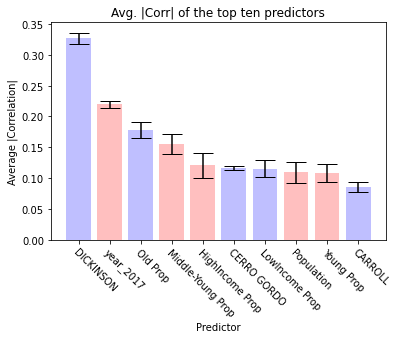

In [26]:
# Plot the correlations
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
data = correlations.sort_values(by = 'Abs Mean Corr', ascending = False).head(10)

data['Color'] = data['Mean'].apply(lambda x : 'blue' if x >= 0 else 'red')

ax.bar(data.index, data['Abs Mean Corr'].values,
       yerr=data['SD'],
       align='center',
       alpha=0.25,
       ecolor='black',
       color = data['Color'],
       capsize=10)


ax.set_xlabel("Predictor")
ax.set_ylabel("Average |Correlation|")
plt.title("Avg. |Corr| of the top ten predictors")
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
plt.savefig('Top10Predictors.pdf', bbox_inches='tight')

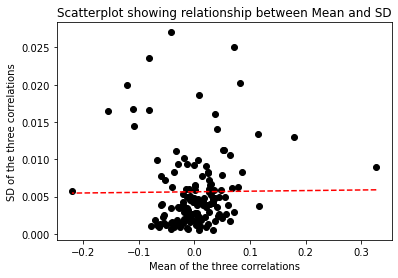

In [27]:
# Plot the relationship between mean and SD
import numpy as np
import matplotlib.pyplot as plt
x = correlations['Mean']
y = correlations['SD']
plt.scatter(x, y, color = 'Black')
plt.xlabel("Mean of the three correlations")
plt.ylabel("SD of the three correlations")
plt.title('Scatterplot showing relationship between Mean and SD')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x),"r--", color = 'Red')

plt.savefig('MeanSDScatterplot.pdf')

In [28]:
correlations['Mean'].corr(correlations['SD'])

0.00907693139424279

In [29]:
correlations['Abs Mean Corr'].corr(correlations['SD'])

0.35193842520770807

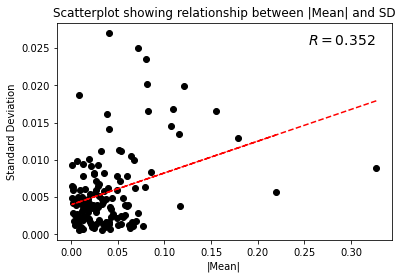

In [30]:
# Plot the relationship between |Mean| and SD
import numpy as np
import matplotlib.pyplot as plt
x = correlations['Abs Mean Corr']
y = correlations['SD']
plt.scatter(x, y, color = 'Black')
plt.xlabel("|Mean|")
plt.ylabel("Standard Deviation")
plt.title('Scatterplot showing relationship between |Mean| and SD')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x),"r--", color = 'Red')

correl = x.corr(y)

text = f"$R = {correl:0.3f}$"
plt.gca().text(0.75, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')

plt.savefig('AbsMeanSDScatterplot.pdf')

In [31]:
correl

0.35193842520770807

In [32]:
correlations['SD'].mean()

0.005654408037409475

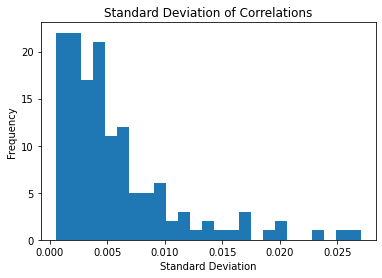

In [33]:
# Plot the standard deviations
ax = correlations['SD'].plot.hist(bins = 25, title = "Standard Deviation of Correlations")
ax.set_xlabel("Standard Deviation")
plt.savefig('SD_Hist.pdf')